# Image Classification with Convolutional neural networks

In [1]:
from tensorflow.keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

9 Ankle boot


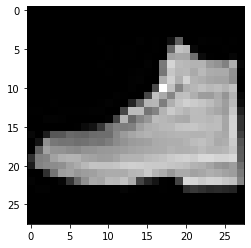

In [4]:
ind=50000
print(ytrain[ind],cnames[ytrain[ind]])
plt.imshow(xtrain[ind],cmap='gray')
plt.show()

### Data processing

In [5]:
# scale the images
xtrain = xtrain/255
xtest = xtest/255

In [6]:
# onehot encode the labels
print(ytrain.shape)
print(ytest.shape)
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# samples, rows, cols, channel
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [9]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Modelling the CNN

<img src="https://miro.medium.com/max/2000/1*1TI1aGBZ4dybR6__DI9dzA.png">

In [10]:
from tensorflow.keras import models,layers

In [21]:
# add the input layer
ip = layers.Input(shape=(28,28,1))

# first conv layer
conv1 = layers.Conv2D(filters=15,kernel_size=(3,3),activation='relu')(ip)
conv2 = layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu')(conv1)

# add the maxpooling layer
mp1 = layers.MaxPooling2D()(conv2)

# add the conv layer
conv3 = layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu')(mp1)
conv4 = layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu')(conv3)

# add the maxpooling layer
mp2 = layers.MaxPooling2D(pool_size=(2,2))(conv4)

# add the flatten layer
ft = layers.Flatten()(mp2)

# add dense layers
d1 = layers.Dense(120,activation='relu')(ft)

# add dense layers
d2 = layers.Dense(84,activation='relu')(d1)

# ouput layer
op = layers.Dense(10,activation='softmax')(d2)

model = models.Model(inputs=ip,outputs=op)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 25)        3400      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        6780      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 40)          10840     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 40)         

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,validation_data=(xtest,ytest))

Epoch 1/10
60/60 [==============================] - 48s 793ms/step - loss: 1.1004 - accuracy: 0.5937 - val_loss: 0.7097 - val_accuracy: 0.7316
Epoch 2/10
60/60 [==============================] - 36s 601ms/step - loss: 0.5970 - accuracy: 0.7734 - val_loss: 0.5511 - val_accuracy: 0.7837
Epoch 3/10
60/60 [==============================] - 50s 827ms/step - loss: 0.4961 - accuracy: 0.8141 - val_loss: 0.4909 - val_accuracy: 0.8237
Epoch 4/10
60/60 [==============================] - 43s 717ms/step - loss: 0.4317 - accuracy: 0.8423 - val_loss: 0.4322 - val_accuracy: 0.8438
Epoch 5/10
60/60 [==============================] - 39s 651ms/step - loss: 0.3947 - accuracy: 0.8566 - val_loss: 0.4116 - val_accuracy: 0.8521
Epoch 6/10
60/60 [==============================] - 34s 574ms/step - loss: 0.3711 - accuracy: 0.8662 - val_loss: 0.3975 - val_accuracy: 0.8596
Epoch 7/10
60/60 [==============================] - 45s 744ms/step - loss: 0.3438 - accuracy: 0.8753 - val_loss: 0.3755 - val_accuracy: 0.8636

In [23]:
ypred = model.predict(xtest)
print(ypred.shape)
ypred = [np.argmax(i) for i in ypred]
ytest2 = [np.argmax(i) for i in ytest]

(10000, 10)


In [24]:
from sklearn import metrics
print(metrics.classification_report(ytest2,ypred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.86      0.75      0.80      1000
           3       0.83      0.93      0.88      1000
           4       0.81      0.78      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.60      0.75      0.67      1000
           7       0.90      0.97      0.94      1000
           8       0.99      0.94      0.96      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



In [25]:
cnames[6]

'Shirt'

In [26]:
pd.DataFrame(metrics.confusion_matrix(ytest2,ypred),columns=cnames,index=cnames)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,769,0,17,54,3,1,152,0,4,0
Trouser,0,963,0,24,3,0,9,0,1,0
Pullover,11,0,747,11,92,0,139,0,0,0
Dress,5,1,8,932,16,0,38,0,0,0
Coat,2,1,34,52,779,0,131,0,1,0
Sandal,0,0,0,1,0,947,0,39,0,13
Shirt,94,1,56,36,62,0,747,0,4,0
Sneaker,0,0,0,0,0,9,0,974,0,17
Bag,4,1,11,13,5,1,22,5,938,0
Ankle boot,1,0,0,0,0,4,0,59,0,936
